<h2>Three tangent circles</h2>
<font size=3>
The idea of this sheet is to let the user put in a single point called "A" <br>
    with its radius and "B" without its radius.<br>
Finally, the code will create a third point called "C"<br>
All three points will be tangent to each other.<br><br>
    An explanation of the code is given below the code cell.

C= [3.68867581 5.5       ]


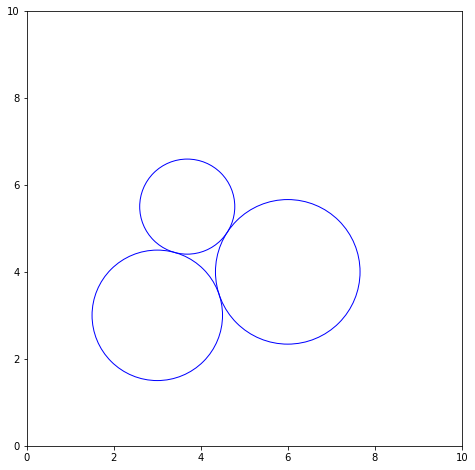

In [25]:
%reset -f

from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

def f(A,B,x,y,r1,r2):
    eq=sqrt((A[0]-x)**2+(A[1]-y)**2)-r1+r2-sqrt((B[0]-x)**2+(B[1]-y)**2)
    return eq

def fp(A,B,x,y,r1,r2):
    eq1=-(A[0]-x)/sqrt((A[0]-x)**2+(A[1]-y)**2) +(B[0]-x)/sqrt((B[0]-x)**2+(B[1]-y)**2)
    return eq1


fig, ax = plt.subplots(figsize=(8,8))

ax.set( aspect=1)

#Center & radius Coordinates of Circle 1:
A=(3,3); r_1=1.5
A = array((3, 3))
circle1 = plt.Circle(A, r_1, color='b', fill=False)
ax.add_patch(circle1)

#Center & radius Coordinates of Circle 2:
B=array((6,4)); 
d=linalg.norm(A-B)
r_2=d-r_1
circle2 = plt.Circle(B, r_2, color='b', fill=False)
ax.add_patch(circle2)


#find the center of circle 3.  It must be on the curve |A-C|-r_1==|B-C|-r_2
#Let the x value of C= ABmidpoint
ABmidpoint=array(((A[0]+B[0])/2,(A[1]+B[1])/2))
y=ABmidpoint[0]+1 #within reason, this is totally arbitrary!!!!

x_n=ABmidpoint[0]

for i in range(8):
    x_n = x_n-f(A,B,x_n,y,r_1,r_2)/fp(A,B,x_n,y,r_1,r_2)
    
C=array((x_n,y))
r_3=linalg.norm(A-C)-r_1
print("C=",C)
circle3 = plt.Circle(C, r_3, color='b', fill=False)
ax.add_patch(circle3)

ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
fig.savefig("tangentCircles.png")


<h2>Three tangent circles</h2>
<font size=3>
The idea of this sheet is to let the user put in a single point called "A"<br>
Then the code will create a second point called "B" <br>
Finally, the code will create a third point called "C"<br>
All three points will be tangent to each other.<br><br>
Begin by defining figure and ax subplots and setting an equal aspect ratio:
    
<blockquote>
<code>    fig, ax = plt.subplots(figsize=(8,8))   
    ax.set( aspect=1)
</code></blockquote>
Now define the first circle.

<blockquote>
<code>    #Center \& radius Coordinates of Circle 1:  
    A=(3,3); r_1=1.5  
    A = array((3, 3))  
    circle1 = plt.Circle(A, r_1, color='b', fill=False)  
    ax.add_patch(circle1)  
</code>
</blockquote>
The second circle will be similar to the first and the user gets to define the center.<br>
However, We will set the radius as $$r_2=|A-B|-r_1$$ Here we are using numpy's linalg.norm(A-B} to get the distance between points $A$ and $B.$ 

<blockquote><code>#Center & radius Coordinates of Circle 2:
B=array((6,4)); 
d=linalg.norm(A-B)
r_2=d-r_1
circle2 = plt.Circle(B, r_2, color='b', fill=False)
ax.add_patch(circle2)
    </code></blockquote>

The third point, $C,$ has an issue. It has to be located on an implicit curve that is always an equidistance from circles $A$ and $B.$ That curve can be given by $$|A-C|-r_1=|B-C|-r_2$$ Assuming for a moment that center_point of $A$ is less than center_point of $B,$ and $A_x<C_x<B_x$ then $r_3\le (r_1 \text{ and }r_2),$  If $C_x$ is not between them, then $r_3>r_1 \text{ and }r_2.$<br><br>
To get point $C,$ I have defined a function for the implicit curve and for it to be a simple function in variable $x,$ then variable $y$ has to be specified with the calling arguments. $$f(x)=\left|A-\left(\begin{array}{c}x \\ y \end{array}\right)\right|-r_1+r_2-\left|B-\left(\begin{array}{c}x \\ y \end{array}\right)\right|$$
I solve this with Newton's method, using an initial guess for $x$ that is the midpoint between $A$ and $B.$ This guess fails if point $A$ and $B$ are directly on top of one another.

<blockquote><code>
    #find the midpoint between A \& B  
    ABmidpoint=array(((A[0]+B[0])/2,(A[1]+B[1])/2))  
</code></blockquote> 
We have to fix point $C_y$ somewhere.  In the code I am calling it $y$. It must not be exactly at the tangent point, else the circle 3 radius will be zero.

<blockquote><code>y=ABmidpoint[0]+1 #within reason, this is totally arbitrary!!!!
</code></blockquote>

I have named the $x$ point $x_n$ which rather stands for $x_{new},$ since I am going to use Newton's method to find the real $x.$
<blockquote><code>x_n=ABmidpoint[0]</code></blockquote>

The function, $f(x)$ and derivative function $fp(x)$ are defined near the top of the code. 

<blockquote><code>def f(A,B,x,y,r1,r2):
    eq=sqrt((A[0]-x)**2+(A[1]-y)**2)-r1+r2-sqrt((B[0]-x)**2+(B[1]-y)**2)
    return eq

def fp(A,B,x,y,r1,r2):
    eq1=-(A[0]-x)/sqrt((A[0]-x)**2+(A[1]-y)**2) +(B[0]-x)/sqrt((B[0]-x)**2+(B[1]-y)**2)
    return eq1
</code></blockquote>

So now we are all set up to run Newton's method.
<blockquote><code>for i in range(8):
    x_n = x_n-f(A,B,x_n,y,r_1,r_2)/fp(A,B,x_n,y,r_1,r_2)
</code></blockquote>  

Now we can define point $C$ and $r_3$ and draw the third tangent circle.

<blockquote><code>C=array((x_n,y))
r_3=linalg.norm(A-C)-r_1
print("C=",C)
circle3 = plt.Circle(C, r_3, color='b', fill=False)
ax.add_patch(circle3)</code></blockquote>

Lastly, before terminating, we can set the plot limits so that the circles show up.

<blockquote><code>
    ax.set_xlim([0, 10]) 
    ax.set_ylim([0, 10])  
</code></blockquote>